In [1]:
import pandas as pd
import numpy as np
from data import get_historical_data

import mplfinance as mpf
import talib as ta

In [2]:
stock_df = get_historical_data('1312.TW')

In [3]:
stock_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock splits
Date,,,,,,,
2021-12-24,28.450001,28.700001,28.400000,28.400000,8295188,0.0,0.0
2021-12-27,28.549999,28.650000,28.450001,28.500000,4416602,0.0,0.0
2021-12-28,28.600000,28.650000,28.450001,28.650000,6108761,0.0,0.0
2021-12-29,28.700001,28.850000,28.600000,28.850000,8043631,0.0,0.0
2021-12-30,28.900000,29.100000,28.750000,28.799999,6983961,0.0,0.0


In [5]:
def atr_stop_loss_and_profit(df ,buy_price, buy_date, pr_ratio=3, atr_ratio=1.5, duration=100, figsize = (20, 10)):
    df['ATR'] = ta.ATR(df['High'],df['Low'],df['Close'],timeperiod=14)
    sell_date = None
    sell_price = None
    df = df.iloc[-duration:] 
    date = df.index
    stop_loss_price = buy_price-atr_ratio*df.loc[buy_date]['ATR']

    mc = mpf.make_marketcolors(up='r',
                            down='g',
                            edge='',
                            wick='inherit',
                            volume='inherit')

    s = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)
    fig,axes = mpf.plot(df, type='candle', style=s, volume=True, mav = 5,
        hlines=dict(hlines=[stop_loss_price, buy_price], linestyle='dashed', alpha=0.7), figsize=figsize, returnfig=True)
    buy_index = df.index.get_loc(buy_date)
    gap = buy_price - stop_loss_price
    buy_s = df[buy_date:]
    mhl = buy_s['Close'].cummax()-gap
    try:
        sell_date = buy_s.iloc[np.where(mhl>buy_s['Close'])].index[0].strftime("%Y-%m-%d")
        sell_price = df.loc[sell_date]['Close']
        sell_price_point = df.loc[sell_date]['High']
        sell_index = df.index.get_loc(sell_date)
        axes[0].annotate(
        'SELL', xy=(sell_index, sell_price_point),xytext=(sell_index, sell_price_point+0.05*sell_price_point) ,
        horizontalalignment="center",
        arrowprops=dict(arrowstyle='->',lw=1)
        )
    except:
        pass

    axes[0].fill_between(range(buy_index,len(df)),y1=stop_loss_price, y2=buy_price, alpha=0.5, color='g')
    axes[0].fill_between(range(buy_index,len(df)),y1=buy_price, y2=mhl.where(mhl>buy_price,buy_price), alpha=0.5, color='r')
    axes[0].text(0, buy_price+0.005*buy_price, 'buy price:'+str(round(buy_price,2)), fontsize=14)
    axes[0].text(0, stop_loss_price+0.005*stop_loss_price, 'stop loss price:'+str(round(stop_loss_price,2)), fontsize=14)
    axes[0].annotate(
        'BUY', xy=(buy_index, buy_price),xytext=(buy_index, buy_price-0.05*buy_price) ,
        horizontalalignment="center",
        arrowprops=dict(arrowstyle='->',lw=1)
        )


    return  pd.DataFrame({'買入日期':buy_date,
                '賣出日期':sell_date,
                '買入價格':buy_price,
                '賣出價格':sell_price},index=['結果'])

,買入日期,賣出日期,買入價格,賣出價格
結果,2021-09-28,2021-09-30,31,28.950001


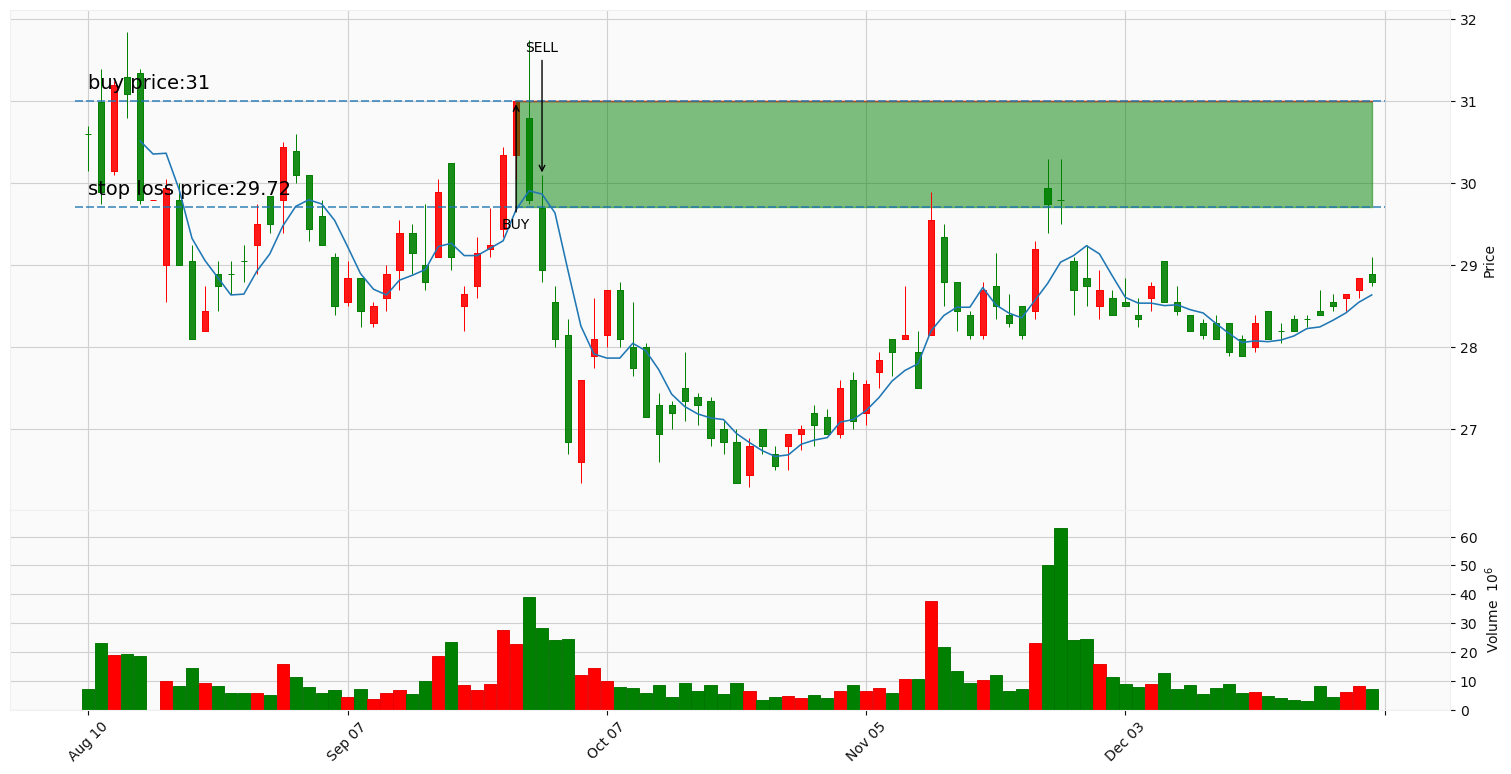

In [6]:
buy_date = '2021-09-28'
buy_price = 31
atr_stop_loss_and_profit(stock_df ,buy_price, buy_date)

,買入日期,賣出日期,買入價格,賣出價格
結果,2021-11-03,2021-11-16,27.5,28.450001


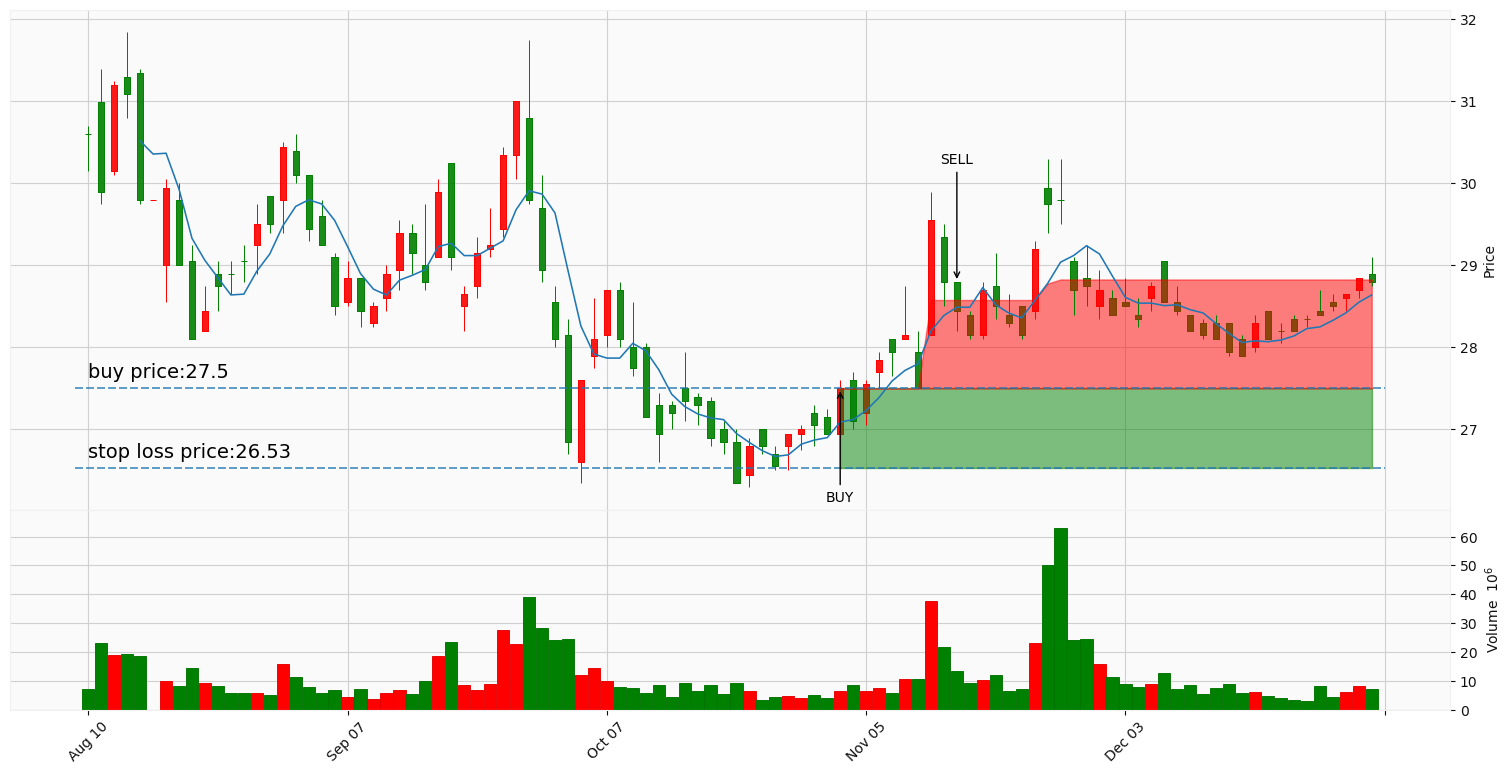

In [7]:
buy_date = '2021-11-03'
buy_price = 27.5
atr_stop_loss_and_profit(stock_df ,buy_price, buy_date)